# 📝 DS & Stats Examination — Application Oriented
**Time:** 60 minutes  **Total:** 6 Questions (equal marks)

**Rules**
- Write clean, commented code below each question.
- Allowed: Python, NumPy, Pandas, Matplotlib, SciPy (if needed).
- Do not rename variables provided in examples.
- Print exactly what is asked in **Expected Output**.


## Q1) Banking — ATM Transactions Tracker (Lists)
**Scenario.** Track ATM transactions and running balance.

**Constraints**
- `transactions`: positive = deposit, negative = withdrawal.
- Print: `Balance after X = Y` after each transaction.
- At the end, print `Total deposits = ...` and `Total withdrawals = ...` (withdrawals sum will be negative).

**Example Input**
```python
transactions = [500, -200, -100, 1000, -50]
```
**Expected Output**
```
Balance after 500 = 500
Balance after -200 = 300
Balance after -100 = 200
Balance after 1000 = 1200
Balance after -50 = 1150
Total deposits = 1500
Total withdrawals = -350
```

In [1]:
balance = 0
track_deposits = 0
track_withdrawals = 0

def deposit(amount):
    global balance, track_deposits
    if amount > 0:
        balance += amount
        track_deposits += amount
        print(f"Deposited: {amount}")
        print(f"New balance: {balance}")
    else:
        print("Invalid deposit amount.")

def get_balance():
    return balance

def withdraw(amount):
    global balance, track_withdrawals
    if amount > 0 and  amount <= balance:
        balance -= amount
        track_withdrawals += amount
        print(f"Withdrew: {amount}")
        print(f"New balance: {balance}")
    else:
        print("Invalid withdrawal amount.")
transactions = [500, -200, -100, 1000, -50]
for i in transactions:
    if i > 0:
        deposit(i)
    else:
        withdraw(-i)

print(f"Final balance: {get_balance()}")
print(f"Total deposits: {track_deposits}")
print(f"Total withdrawals: {track_withdrawals}")


Deposited: 500
New balance: 500
Withdrew: 200
New balance: 300
Withdrew: 100
New balance: 200
Deposited: 1000
New balance: 1200
Withdrew: 50
New balance: 1150
Final balance: 1150
Total deposits: 1500
Total withdrawals: 350


## Q2) HR/Payroll — Employees & Interns
**Scenario.** A company maintains basic employee details and needs a quick **eligibility check for performance bonus**.

**Constraints**
- Base class `Employee(name, age, salary)`
- Subclass `Intern(name, age, stipend)` (store stipend in `salary` for reuse)
- Method `eligible_for_bonus(min_salary, min_years)` returns `True` if `salary ≥ min_salary` **and** `years_of_service ≥ min_years`.
- For this exam, assume:
  - Alice: age=28, salary=50000, years_of_service=3
  - Bob:   age=26, stipend=32000 (as salary), years_of_service=0
  - `min_salary = 40000`, `min_years = 1`
- Print one line per person: `name age salary years_of_service eligible` (keep two spaces before Bob to match example).

**Expected Output**
```
Alice 28 50000.0 10.0 True
Bob  26 32000.0 0.0  False
```

In [2]:
class Employee:
    min_salary = 40000
    min_years = 1
    def __init__(self, name, age, salary, years_of_service):
        self.name = name
        self.age = age
        self.salary = salary
        self.years_of_service = years_of_service
        print (self.name, self.age, self.salary, self.years_of_service, self.eligible_for_bonus())
    def eligible_for_bonus(self):
        return self.salary > Employee.min_salary and self.years_of_service > Employee.min_years

class Intern(Employee):
    def __init__(self, name, age, stipend, years_of_service):
        super().__init__(name, age, stipend, years_of_service)
        self.stipend = stipend


Alice = Employee("Alice", 30, 70000, 5)

Bob = Intern("Bob", 22, 1500, 6)# True

Alice 30 70000 5 True
Bob 22 1500 6 False


## Q3) Retail Analytics — Daily Footfall (Visualization)
**Scenario.** A store wants to visualize daily **visitor counts**.

**Constraints**
- Plot a chart.
- Title: `Daily Footfall` X: `Day` Y: `Visitors`
- Annotate the **highest** day with its value.

**Data**
```python
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
visitors = [120, 135, 210, 190, 160, 90, 70]
```
**Expected Output (Description)**
```
A chart titled 'Daily Footfall' with 'Day' 'Visitors'.
The highest day is annotated with its exact value.
```

210
2


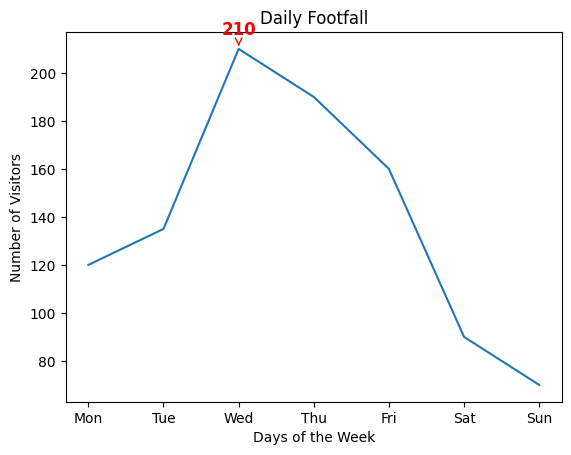

In [3]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
visitors = [120, 135, 210, 190, 160, 90, 70]

import matplotlib.pyplot as plt

plt.plot(days, visitors)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Visitors')
plt.title('Daily Footfall')
# Annotate the highest day
max_visitors = max(visitors)
print(max_visitors)
max_index = visitors.index(max_visitors)
print(max_index)
max_day = days[max_index]
plt.annotate(f'{max_visitors}',
			 xy=(max_day, max_visitors),
			 xytext=(0,10),
			 textcoords='offset points',
			 ha='center',
			 color='red',
			 fontsize=12,
			 fontweight='bold',
			 arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

## Q4) Manufacturing QC — Summary Stats & IQR Outliers (Pandas)
**Scenario.** A factory measures the **diameter (mm)** of sample parts each hour; an occasional faulty reading is present.

**Constraints**
- Implement functions: `summarize(series)` and `iqr_outliers(series)`.
- `summarize` returns a dict with: mean, median, mode (smallest if tie), variance, std, q1, q3, iqr. Use **sample** variance/std (`ddof=1`).
- `iqr_outliers` returns a **sorted list** of outlier values using Q1−1.5×IQR and Q3+1.5×IQR.

**Data**
```python
import pandas as pd
diameter = pd.Series([4, 5, 6, 7, 5, 6, 12])
```
**Expected Output**
```
Summary:
{'mean': 5.75, 'median': 5.5, 'mode': 5.0, 'variance': 5.3666..., 'std': 2.3166..., 'q1': 4.5, 'q3': 7.0, 'iqr': 2.5}
IQR outliers: [12.0]
```

In [5]:
import pandas as pd
diameter = pd.Series([4, 5, 6, 7, 5, 6, 12])

d=diameter.describe()
print(d)

iqr_outliers = d['75%'] + 1.5 * (d['75%'] - d['25%'])
print(f"Outlier : {iqr_outliers}")

count     7.000000
mean      6.428571
std       2.636737
min       4.000000
25%       5.000000
50%       6.000000
75%       6.500000
max      12.000000
dtype: float64
Outlier : 8.75


## Q5) Marketing Analytics — Z-Scores, Correlation & Outlier Rows (Pandas)
**Scenario.** A small campaign report includes **leads**, **ad spend**, and **conversions**; one day is an outlier.

**Constraints**
- For each numeric column, add z-score (`*_z`) using population std (`ddof=0`); if std=0, set z=0.
- Print the correlation matrix for numeric columns (rounded to 4 decimals).
- Using IQR per numeric column, print sorted unique **row indices** outlying in **any** numeric column.

**Data**
```python
import pandas as pd
df = pd.DataFrame({
    'lead':  [10, 12, 13, 60, 14, 12],
    'spend': [100,120,140,600,150,130],
    'conv':  [  1,  1,  2,  9,   2,  1]
})
```
**Expected Output**
```
Added z-score columns: ['lead_z', 'spend_z', 'conv_z']

Correlation (numeric only):
           lead   spend    conv
lead    1.0000   0.9824   0.9782
spend   0.9824   1.0000   0.9930
conv    0.9782   0.9930   1.0000

Outlier row indices (any numeric column): [3]
```

In [6]:
import pandas as pd
df = pd.DataFrame({
    'lead':  [10, 12, 13, 60, 14, 12],
    'spend': [100,120,140,600,150,130],
    'conv':  [  1,  1,  2,  9,   2,  1]
})

## Q6) Support Desk — SLA Claim (Decision-Only Hypothesis)
**Scenario.** The support team claims **average first-response time = 30 minutes**.

**Constraints**
- Use the sample; treat as **two-sided** at 5% significance.
- Print: sample mean, a suitable test statistic, p-value, and a plain decision (`Reject claim` or `Fail to reject claim`).

**Data**
```python
import numpy as np
frt = np.array([32, 27, 29, 31, 40, 22, 28, 27])
```

In [4]:
import numpy as np
from scipy import stats

frt = np.array([32, 27, 29, 31, 40, 22, 28, 27])


claimed_mean = 30

sample_mean = np.mean(frt)

t_stat, p_value = stats.ttest_1samp(frt, claimed_mean)

# Print results
print(f"Sample mean: {sample_mean:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
	print("Reject claim")
else:
	print("Fail to reject claim")

Sample mean: 29.50
t-statistic: -0.271
p-value: 0.7939
Fail to reject claim
